# Analyses discriminantes


Les analyses discriminante linéaire (LDA) et quadratiques (QDA) sont des approches paramétriques qui considèrent le logarithme du rapport : 

$$
\log\left ( \frac{P(\omega=\omega_k | { X} =  {\mathbf x})}{P(\omega=\omega_l | { X} = {\mathbf x})} \right )
$$

pour tous les couples de classes $(\omega_k, \omega_l),l,k\in[\![1,C]\!]$ et retournent la classe pour laquelle ce logarithme est toujours positif. 

LDA et QDA sont des cas particuliers du classifieur de Bayes, appliqué lorsque toutes les densités de probabilité sont des gaussiennes multivariées.

On note dans la suite pour chaque classe $1\leq i\leq C$ 

$$
g_i(\mathbf x_0) = P(\omega=\omega_i |{\mathbf x} = { \mathbf x_0}) \; = \; \frac{P({{\mathbf x} = { \mathbf x_0}}|\omega=\omega_i)\,P(\omega={\omega_i}) }{\displaystyle\sum_{j=1}^C P({\mathbf x} ={ \mathbf x_0}|\omega=\omega_j)\, P({\omega=\omega_j})} = \frac{f_i(\mathbf x_0) \pi_i}{\displaystyle\sum_{j=1}^C f_j(\mathbf x_0) \pi_j}
$$

avec donc $f_i(\mathbf x_0) =  P({{\mathbf x} = {\mathbf x_0}}|\omega=\omega_i)$ et $\pi_i = P(\omega={\omega_i})$ 

## Analyse discriminante linéaire (LDA)


On s'intéresse pour l'exemple au cas $C=2$, et où les distributions de toutes les classes sont des gaussiennes multivariées. On pose donc 

$$f_i(x) \; = \; \frac{1}{(2 \pi)^{d/2} \, |{ \Sigma}_i|^{1/2}} \, e^{-\frac{1}{2} ({\mathbf x} - \mu_i)^{\top} { \Sigma}_i^{-1} ({\mathbf x} - \mu_i)}$$

On cherche alors la frontière de décision du classifieur, c'est-à-dire les points $\mathbf x$ tels que $g_0(\mathbf x) = g_1(\mathbf x)$, soit 

$$\frac{f_0(\mathbf x) \pi_0}{\displaystyle\sum_{j=1}^C f_j(\mathbf x) \pi_j} = \frac{f_1(\mathbf x) \pi_1}{\displaystyle\sum_{j=1}^C f_j(\mathbf x) \pi_j}$$

d'où $f_0(\mathbf x)\pi_0 = f_1(\mathbf x)\pi_1$

ou encore

$$\frac{1}{(2 \pi)^{d/2} \, |{ \Sigma}_0|^{1/2}} \, e^{-\frac{1}{2} ({\mathbf x} - \mu_0)^{\top} { \Sigma}_0^{-1} ({\mathbf x} - \mu_0)} = \frac{1}{(2 \pi)^{d/2} \, |{ \Sigma}_1|^{1/2}} \, e^{-\frac{1}{2} ({\mathbf x} - \mu_1)^{\top} { \Sigma}_1^{-1} ({\mathbf x} - \mu_1)}$$

Dans le cas où l'on suppose que les distributions ont les  mêmes matrices de covariance  ${ \Sigma}_i = { \Sigma}$, le critère de décision se simplifie : 

$$\pi_1e^{-\frac{1}{2} ({\mathbf x} - \mu_1)^{\top} { \Sigma}^{-1} ({\mathbf x} - \mu_1)} = \pi_0e^{-\frac{1}{2} ({\mathbf x} - \mu_0)^{\top} { \Sigma}^{-1} ({\mathbf x} - \mu_0)}$$

En passant au logarithme :

$$log \pi_1 -\frac{1}{2} ({\mathbf x} - \mu_1)^{\top} { \Sigma}^{-1} ({\mathbf x} - \mu_1) = log \pi_0 -\frac{1}{2} ({\mathbf x} - \mu_0)^{\top} { \Sigma}^{-1} ({\mathbf x} - \mu_0)$$

et donc 

$$log \left ( \frac{\pi_1}{\pi_0} \right ) + \frac{1}{2} \left [(\mu_0^T\Sigma^{-1}\mu_0)^T-(\mu_1^T\Sigma^{-1}\mu_1)^T \right ] + (\mu_1-\mu_0)^T\Sigma^{-1} x = 0$$

Si $a^T = (\mu_1-\mu_0)^T\Sigma^{-1}$ et $b = log \left ( \frac{\pi_1}{\pi_0} \right ) + \frac{1}{2} \left [(\mu_0^T\Sigma^{-1}\mu_0)^T-(\mu_1^T\Sigma^{-1}\mu_1)^T \right ]$ alors la frontière de décision est linéaire et telle que 

$$a^Tx + b = 0$$

Il reste à estimer les paramètres des gaussiennes. En pratique, on les estime à partir de la base d'apprentissage $E$ : 

- $\hat{\pi_i} = \frac{n_i}{n}$, où $n_i$ est le nombre d'individus de la classe $i$ dans $E$, et $n= card(E)$
-  $\hat{\mu_i} = \frac{1}{n_i}\displaystyle\sum_{j,y_j=i}\mathbf x_j$
-  $\Sigma_i = \frac{1}{n_i-n}\displaystyle\sum_{j,y_j=i}\left (\mathbf x_j- \hat{\mu_i}\right )\left(\mathbf x_j- \hat{\mu_i}\right )^T$ et $\Sigma=\frac{1}{n}\displaystyle\sum_{j=1}^C \Sigma_j$


Dans le cas où le nombre d'exemples d'apprentissage est faible en regard du nombre de descripteurs, l'estimateur de la matrice de covariance précédent donne de mauvais résultats. Une technique de shrinkage peut alors être utilisée pour obtenir les paramètres des lois.

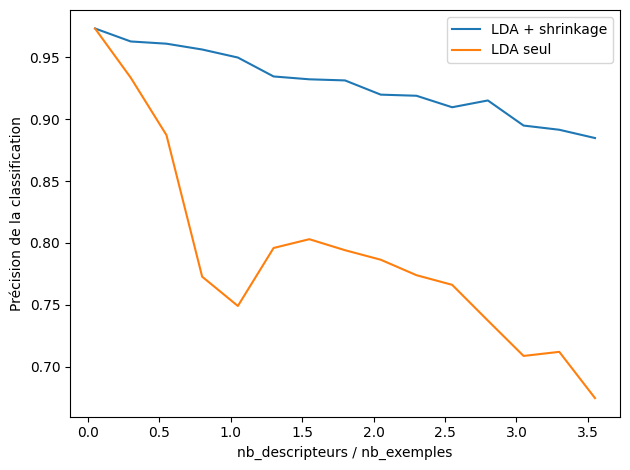

In [1]:
from scipy import linalg
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import colors

import warnings
warnings.filterwarnings('ignore')

# Affichage 
def Ellipse(splot, mean, cov, color):
    v, w = linalg.eigh(cov)
    u = w[0] / linalg.norm(w[0])
    angle = np.arctan(u[1] / u[0])
    angle = 180 * angle / np.pi  
    ell = mpl.patches.Ellipse(mean, 2 * v[0] ** 0.5, 2 * v[1] ** 0.5,
                              180 + angle, facecolor=color, edgecolor='yellow',
                              linewidth=2, zorder=2)
    ell.set_clip_box(splot.bbox)
    ell.set_alpha(0.5)
    splot.add_artist(ell)
    splot.set_xticks(())
    splot.set_yticks(())
    

def plot_data(lda, X, y, y_pred, title,i):
    splot = plt.subplot(1, 2, i)

    plt.title(title)

    tp = (y == y_pred) 
    tp0, tp1 = tp[y == 0], tp[y == 1]
    X0, X1 = X[y == 0], X[y == 1]
    X0_tp, X0_fp = X0[tp0], X0[~tp0]
    X1_tp, X1_fp = X1[tp1], X1[~tp1]

    alpha = 0.5

    plt.plot(X0_tp[:, 0], X0_tp[:, 1], 'o', alpha=alpha,color='red')
    plt.plot(X0_fp[:, 0], X0_fp[:, 1], '*', alpha=alpha,color='#990000')  

    plt.plot(X1_tp[:, 0], X1_tp[:, 1], 'o', alpha=alpha,color='blue')
    plt.plot(X1_fp[:, 0], X1_fp[:, 1], '*', alpha=alpha,color='#000099')  

    nx, ny = 200, 100
    x_min, x_max = plt.xlim()
    y_min, y_max = plt.ylim()
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))
    Z = lda.predict_proba(np.c_[xx.ravel(), yy.ravel()])
    Z = Z[:, 1].reshape(xx.shape)
    plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',norm=colors.Normalize(0., 1.))
    plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='k')

    plt.plot(lda.means_[0][0], lda.means_[0][1],
             'o', color='black', markersize=10)
    plt.plot(lda.means_[1][0], lda.means_[1][1],
             'o', color='black', markersize=10)
    plt.gca().set_aspect("equal")
    return splot

def plot_cov(method, splot):
    if method==lda:
        Ellipse(splot, method.means_[0], method.covariance_, 'red')
        Ellipse(splot, method.means_[1], method.covariance_, 'blue')
    else:
        Ellipse(splot, method.means_[0], method.covariance_[0], 'red')
        Ellipse(splot, method.means_[1], method.covariance_[1], 'blue')



from sklearn.datasets import make_blobs
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

nb_exemples = 20  
nb_test = 200  
n_averages = 50  
n_max = 75  

def blobs(n_samples, n_features):
    X, y = make_blobs(n_samples=n_samples, n_features=1, centers=[[-2], [2]])
    # ajout de descripteurs non discriminants
    if n_features > 1:
        X = np.hstack([X, np.random.randn(n_samples, n_features - 1)])
    return X, y

acc_lda, acc_ldas = [], []
nb_descripteurs = range(1, n_max, 5)
for n_features in nb_descripteurs:
    score_lda, score_ldas = 0, 0
    for _ in range(n_averages):
        X, y = blobs(nb_exemples, n_features)

        lda = LinearDiscriminantAnalysis(solver='lsqr', shrinkage='auto').fit(X, y)
        ldas = LinearDiscriminantAnalysis(solver='lsqr', shrinkage=None).fit(X, y)

        X, y = blobs(nb_test, n_features)
        score_lda += lda.score(X, y)
        score_ldas += ldas.score(X, y)

    acc_lda.append(score_lda / n_averages)
    acc_ldas.append(score_ldas / n_averages)

ratio = np.array(nb_descripteurs) / nb_exemples

plt.plot(ratio, acc_lda,
         label="LDA + shrinkage")
plt.plot(ratio, acc_ldas,
         label="LDA seul")

plt.xlabel('nb_descripteurs / nb_exemples')
plt.ylabel('Précision de la classification')

plt.legend(loc='best')
plt.tight_layout()

Voici un exemple de LDA sur deux classes.

In [2]:
from scipy import linalg
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import colors



def plot_cov(method, splot):
    if method==lda:
        Ellipse(splot, method.means_[0], method.covariance_, 'red')
        Ellipse(splot, method.means_[1], method.covariance_, 'blue')
    else:
        Ellipse(splot, method.means_[0], method.covariance_[0], 'red')
        Ellipse(splot, method.means_[1], method.covariance_[1], 'blue')

# Génération des données

cmap = colors.LinearSegmentedColormap(
    'red_blue_classes',
    {'red': [(0, 1, 1), (1, 0.7, 0.7)],
     'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
     'blue': [(0, 0.7, 0.7), (1, 1, 1)]})
plt.colormaps.register_cmap(cmap=cmap)


#  Gaussiennes multivariées, covariances égales ou non
def dataset_cov(fixed = True):
    n, dim = 150, 2
    np.random.seed(0)
    if fixed:
        C = np.array([[0., -0.23], [0.83, .23]])
        X = np.r_[np.dot(np.random.randn(n, dim), C),
              np.dot(np.random.randn(n, dim), C) + np.array([1, 1])]
    else:
        C = np.array([[0., -1.], [2.5, .7]]) * 2.
        X = np.r_[np.dot(np.random.randn(n, dim), C),
              np.dot(np.random.randn(n, dim), C.T) + np.array([1, 15])]
    y = np.hstack((np.zeros(n), np.ones(n)))
    return X, y


from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(solver="svd", store_covariance=True)
plt.figure(figsize=(12, 4))

(X,y)=dataset_cov()
y_pred = lda.fit(X,y).predict(X)
splot = plot_data(lda, X,y, y_pred, "Covariances égales",1)
plot_cov(lda, splot)
plt.axis('tight')

(X,y)=dataset_cov(fixed=False)
y_pred = lda.fit(X,y).predict(X)
splot = plot_data(lda,X,y, y_pred, "Covariances différentes",2 )
plot_cov(lda, splot)
plt.axis('tight')
plt.tight_layout()

AttributeError: 'ColormapRegistry' object has no attribute 'register_cmap'

## Analyse discriminante de Fisher

Il est possible d'aborder l'analyse discriminante linéaire sans a priori gaussien. 

L'idée de l'analyse discriminante de Fisher (FDA) est de rechercher des représentants des classes, et d'éloigner le plus possible des points les uns des autres, en projetant les données sur une direction de séparation maximale, tout en préservant la cohésion des classes. 

La FDA se formalise bien sous forme matricielle. 

### Cas de deux classes

On suppose ici le cas de la classification binaire  : $y_i\in\{0,1\}\forall i\in[\![1,n]\!]$. Les classes ont pour centres de masse les points $ {\mu}_j$, qui sont donc les représentants de ces classes. 


- Maximiser la distance entre les représentants par projection sur une droite $Lin( \mathbf w)$ revient donc à résoudre :

$$
\displaystyle\max_{\mathbf w} \left [ {\mathbf w}^T{ \mu_0}- {\mathbf w}^T\mu_1\right ]^2 &=&\displaystyle\max_{\mathbf w} \left [ \left ({\mathbf w}^T\mu_0- {\mathbf w}^T\mu_1\right )^T \left ({\mathbf w}^T\mu_0- {\mathbf w}^T\mu_1\right )\right ]\\
&=&\displaystyle\max_{\mathbf w} \left [\left (\mu_0-\mu_1\right )^T{\mathbf w}{\mathbf w}^T\left (\mu_0-\mu_1\right )\right ]\\
&=&\displaystyle\max_{\mathbf w} \left [{\mathbf w}^T \left (\mu_0-\mu_1\right )\left (\mu_0-\mu_1\right )^T{\mathbf w}\right ]\\
&=&\displaystyle\max_{\mathbf w} \left [{\mathbf w}^T { S_B}{\mathbf w}\right ]
$$ 

où ${ S_B}$ est la matrice de covariance interclasse.

-  Préserver la cohésion des classes revient à minimiser la variance intra classe. Après projection, cette dernière se définit pour la classe $j\in[\![1,1]\!]$ par ${\mathbf w}^T \Sigma_j {\mathbf w}$, où $\Sigma_j$ est la matrice de covariance de la classe $j$. L'objectif se traduit donc par :

$$
\displaystyle\min_{\mathbf w} {\mathbf w}^T \left ( \Sigma_0+\Sigma_1\right ) {\mathbf w}=\displaystyle\min_{\mathbf w} {\mathbf w}^T { S_W} {\mathbf w}
$$

où ${ S_W}$ est la matrice de covariance intraclasse.


Ainsi, l'analyse discriminante de Fisher revient à résoudre le problème d'optimisation suivant :

$$\displaystyle\max_{\mathbf w}\frac{{\mathbf w}^T { S_B}{\mathbf w}}{{\mathbf w}^T { S_W} {\mathbf w}}$$
ou de manière équivalente

$$
&&\displaystyle\max_{\mathbf w} {\mathbf w}^T { S_B}{\mathbf w}\\
&s.c&\;\; {\mathbf w}^T { S_W} {\mathbf w}=1
$$ 

L'annulation du gradient du Lagrangien donne  $2{ S_B}{\mathbf w}-2\lambda { S_W}{\mathbf w}=0$, d'où $\left ( { S_B}-\lambda { S_W}\right ) {\mathbf w}=0$. ${\mathbf w}$ est donc vecteur propre de $\left ( { S_B}-\lambda { S_W}\right )$ associé à 0. 

Alors ${ S_W}^{-1}{ S_B}{\mathbf w}=\lambda{\mathbf w}$ et ${\mathbf w}$ vecteur propre de  ${ S_W}^{-1}{ S_B}$ associé au multiplicateur de Lagrange $\lambda$. Or $Rg({ S_W}^{-1}{ S_B})=1$, car $ S_B$ est de rang 1 (c'est la projection sur $Lin \left(\left (\mu_0-\mu_1\right )\right)$ donc ${\mathbf w}$ est unique.

### Cas multiclasses
Pour un problème à $C$ classes, l'analyse projette sur $C-1$ directions de projection. La somme des variances interclasses est $Tr\left({\mathbf w}^T{ S_B}{\mathbf w}\right )$, et la variance intraclasse totale est $Tr\left ({\mathbf w}^T{ S_W}{\mathbf w}\right )$, où ${\mathbf w}$ est une matrice à $C-1$ colonnes, les colonnes étant les vecteurs successifs sur lesquels sont projetées les données.

Le problème d'optimisation s'écrit alors 

$$\displaystyle\max_{\mathbf w}\frac{Tr\left({\mathbf w}^T{ S_B}{\mathbf w}\right )}{Tr\left ({\mathbf w}^T{ S_W}{\mathbf w}\right )}$$
et par les mêmes calculs, les solutions sont les vecteurs prores de ${ S_W}^{-1}{ S_B}$, de rang $C-1$.



## Analyse discriminante quadratique (QDA)
Si on relâche l'égalité des matrices de covariance, la frontière n'est plus linéaire, mais quadratique.

La règle de décision est alors d'affecter $x$ à la classe $i$ qui maximise

$$-\frac{1}{2}log |{ \Sigma}_i| -\frac{1}{2}  ({\mathbf x} - \mu_i)^{\top} { \Sigma}_i^{-1} ({\mathbf x} - \mu_i) + log \pi_i$$

Deux cas se présentent alors :

- dans le premier cas, les classes sont supposées sphériques, $\Sigma_i=I,\forall i$ : dans ce cas la règle de décision est 
$-\frac{1}{2}  \|{\mathbf x} - \mu_i\|^{2} + log \pi_i$. 
1. Si les distributions a priori $\pi_i$ sont toutes égales, alors on affecte $\mathbf x$ à la classe la plus proche, puisque la règle de décision revient à minimiser $\|{\mathbf x} - \mu_i\|^{2}$. L'analyse discriminante quadratique fait de la classification au plus proche voisin
2. Si les distributions a priori $\pi_i$ ne sont pas toutes égales, $\|{\mathbf x} - \mu_i\|^{2}$ est ajusté en fonction des effectifs des classes
- dans tous les autres cas, en écrivant $\Sigma_i$ à l'aide d'une décomposition en valeurs singulières, on a $\Sigma_i=USV^T$, avec $U=V$ ($\Sigma_i$ symétrique), $U$ matrice orthogonale des vecteurs propres de $\Sigma_i\Sigma_i^T$. 
Donc 

$$
({\mathbf x} - \mu_i)^{\top}\Sigma_i^{-1}({\mathbf x} - \mu_i)&=&({\mathbf x} - \mu_i)^{\top} US^{-1}U^T ({\mathbf x} - \mu_i)\\
&=&(U^T{\mathbf x} - U^T\mu_i)^{\top} S^{-1} (U^T{\mathbf x} - U^T\mu_i)
$$

Or $S$ diagonale à valeurs positives ($\Sigma_i$ est semi définie positive) donc $S^{-1}=S^{-1/2}S^{-1/2}$ et 

$$
({\mathbf x} - \mu_i)^{\top}\Sigma_i^{-1}({\mathbf x} - \mu_i)&=&(U^T{\mathbf x} - U^T\mu_i)^{\top} S^{-1/2}S^{-1/2} (U^T{\mathbf x} - U^T\mu_i)\\
&=&(S^{-1/2}U^T{\mathbf x} - S^{-1/2}U^T\mu_i)^{\top} (S^{-1/2}U^T{\mathbf x} -S^{-1/2}U^T\mu_i)\\
&=&\|S^{-1/2}U^T{\mathbf x} -S^{-1/2}U^T\mu_i\|^2
$$

On note alors $A^T=S^{-1/2}U^T$ de sorte que 

$$({\mathbf x} - \mu_i)^{\top}\Sigma_i^{-1}({\mathbf x} - \mu_i)=\|A^Tx-A^T\mu_i\|^2$$
et on se ramène au cas sphérique par transformation linéaire $A^T$.

In [ ]:
from scipy import linalg
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import colors


#  Gaussiennes multivariées, covariances égales ou non
def dataset_cov(fixed = True):
    n, dim = 150, 2
    np.random.seed(0)
    if fixed:
        C = np.array([[0., -0.23], [0.83, .23]])
        X = np.r_[np.dot(np.random.randn(n, dim), C),
              np.dot(np.random.randn(n, dim), C) + np.array([1, 1])]
    else:
        C = np.array([[0., -1.], [2.5, .7]]) * 2.
        X = np.r_[np.dot(np.random.randn(n, dim), C),
              np.dot(np.random.randn(n, dim), C.T) + np.array([1, 15])]
    y = np.hstack((np.zeros(n), np.ones(n)))
    return X, y

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda = QuadraticDiscriminantAnalysis(store_covariance=True)
plt.figure(figsize=(12, 4))

(X,y)=dataset_cov()
y_pred = qda.fit(X,y).predict(X)
splot = plot_data(qda, X,y, y_pred, "Covariances égales",1)
plot_cov(qda, splot)
plt.axis('tight')

(X,y)=dataset_cov(fixed=False)
y_pred = qda.fit(X,y).predict(X)
splot = plot_data(qda,X,y, y_pred, "Covariances différentes",2 )
plot_cov(qda, splot)
plt.axis('tight')

## Nombre de paramètres

Pour prédire la classe de nouvelles données par LDA ou QDA,  il faut d'abord apprendre les paramètres sous-jacents à partir des $n$ données d'apprentissage.

- pour LDA et QDA on doit apprendre les $\pi_i$ les les vecteurs $\mu_i, i\in[\![1,c]\!]$
- on doit apprendre les $\Sigma_i$ pour QDA, et $\Sigma$ pour LDA

ce qui amène à $C-1+Cn+\frac{n(n+1)}{2}$ paramètres pour LDA et $C-1+Cn+C\frac{n(n+1)}{2}$ paramètres pour QDA.

La {numref}`nbparam-ref` montre la comparaison du nombre de paramètres à apprendre en fonction de la taille de la base d'apprentissage. Ici $C$=5.

```{figure} ./images/nbparam.png
:name: nbparam-ref
Nombre de paramètres à apprendre pour LDA et QDA.
```